In [1]:
import pandas as pd
import numpy as np 
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
pd.options.display.max_rows=None
pd.options.display.max_columns=None
from sklearn.metrics import accuracy_score

# RFE and Neural Networks(Back Propogation)

In [2]:
df1=pd.read_csv("random_imputed.csv",index_col=[0])
#df1_other=pd.read_csv("random_imputed.csv",index_col=[0])
df2=pd.read_csv("Raw_NaN.csv",index_col=[0])
df3=pd.read_csv("drug_onehot_latest.csv",index_col=[0])

In [3]:
from sklearn import preprocessing

In [4]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df1)

In [5]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df1)

In [6]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df1)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.metrics import binary_accuracy
from tensorflow.keras.utils import to_categorical

In [8]:
df1.drop(['gender','ageCat'],inplace=True,axis=1)

In [9]:
df4=df3['Atorvastatin calcium tablet']
df4 = df4.to_frame()

In [11]:
df1.shape

(2003, 126)

>30 0.617 (0.039)
>31 0.613 (0.032)
>32 0.618 (0.035)
>33 0.619 (0.032)
>34 0.624 (0.035)
>35 0.623 (0.034)
>36 0.619 (0.038)
>37 0.622 (0.032)
>38 0.624 (0.039)
>39 0.619 (0.033)
>40 0.624 (0.038)
>41 0.624 (0.040)
>42 0.624 (0.036)
>43 0.629 (0.035)
>44 0.622 (0.034)
>45 0.626 (0.036)
>46 0.627 (0.034)
>47 0.625 (0.031)
>48 0.625 (0.032)
>49 0.628 (0.033)
>50 0.629 (0.034)
>51 0.625 (0.032)
>52 0.629 (0.030)
>53 0.628 (0.031)
>54 0.630 (0.033)
>55 0.628 (0.029)
>56 0.628 (0.033)
>57 0.631 (0.035)
>58 0.630 (0.030)
>59 0.630 (0.033)
>60 0.628 (0.033)
>61 0.630 (0.033)
>62 0.628 (0.033)
>63 0.630 (0.037)
>64 0.628 (0.037)
>65 0.630 (0.034)
>66 0.630 (0.036)
>67 0.633 (0.034)
>68 0.633 (0.035)
>69 0.633 (0.039)
>70 0.631 (0.035)
>71 0.632 (0.038)
>72 0.630 (0.040)
>73 0.630 (0.037)
>74 0.629 (0.038)
>75 0.631 (0.039)
>76 0.633 (0.037)
>77 0.634 (0.038)
>78 0.629 (0.041)
>79 0.635 (0.042)
>80 0.628 (0.038)
>81 0.631 (0.035)
>82 0.630 (0.033)
>83 0.632 (0.038)
>84 0.629 (0.036)
>85 0.629 

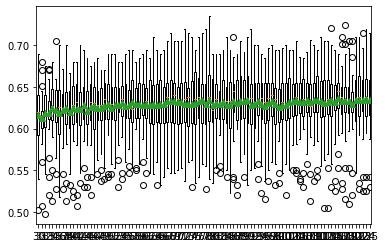

In [16]:

# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	return standard_df, df4
 
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(30, 126):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = LogisticRegression()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [27]:
standard_df.shape

(2003, 128)

In [18]:
li = []

In [24]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=79)
# fit RFE
rfe.fit(standard_df, df4)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))
	if(rfe.support_[i]==True):
		li.append(standard_df.columns[i])

Column: 0, Selected False, Rank: 50.000
Column: 1, Selected True, Rank: 1.000


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [23]:
print(li)

[array([-0.85073624, -0.94734154, -0.61425877,  1.10107789,  0.76843667,
        0.23669226,  0.52766437, -0.01051603,  0.58875189,  1.2744224 ,
       -1.30466548, -0.27518181,  0.26989653, -0.23043871, -0.2845168 ,
       -0.24680157, -0.36282009, -0.04473254, -0.15160025, -0.54677453,
       -0.5552434 , -0.07763454,  0.        , -0.02234951, -0.14091641,
       -0.2092195 , -0.04473254, -0.89646457, -0.24566113, -0.12624903,
        0.12881372,  0.14038055,  0.13280819, -0.13799593,  4.14838413,
       -2.45149009, -0.05481338, -1.28092421, -0.07443229,  0.4194423 ,
        0.83006799,  0.14891947,  1.19303033,  1.24115807, -0.88035386,
        0.0190067 ,  2.28277903, -1.68711774,  2.06668894,  3.59367495,
        1.40500326, -0.13534555, -0.05367003,  1.10588521, -0.14967518,
       -2.04122301, -0.15516503, -0.72862533, -0.22910593, -0.40948517,
       -1.15301527, -1.21373314, -0.55327003,  1.17025955, -2.22939678,
       -1.06147887, -0.41980352, -0.16724927,  0.15377781, -0.5